In [1]:
import numpy as np
import math
import random


In [2]:
#число бросков
L = 300

#матрицы переходов и эмиссий
w = float(1 / 6)
a = np.array([[0.95, 0.05], [0.1, 0.9]], float)
e = np.array([[w, w, w, w, w, w], [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]], float)

#начальное статическое распределение: px - четная кость, py - нечестная, a - матрица распределения
#qA = q
#(x, y)(a) = (x, y)
#x + y = 1
#получаем систему уравнений:
#0.5x + 0.05y = x
#x + y = 1
#P(x, y) = np.array([2/3], [1/3])

In [3]:
#случайная последовательность при заданных параметрах E и A
def HMM(e, a, L):
    if 0 <= random.random() < (2 / 3):
        D = 0
    else:
        D = 1
    path = []
    s = []
    for i in range(L):
        X = random.random()
        K = random.random()
        if (D == 0) and (X < 0.05):
            D = 1
        elif (D == 1) and (X < 0.1):
            D = 0
        if D == 0:
            s.append("0")
            path.append(random.randint(1, 6))
        elif D == 1:
            s.append("1")
            if K < 0.5:
                path.append(6)
            else:
                path.append(random.randint(1, 5))
    return(path, s)


path, s = HMM(e, a, L)

#наблюдение:
print(path)

#состояние:
print(s)

[1, 4, 2, 4, 4, 4, 5, 4, 4, 3, 6, 6, 6, 6, 6, 1, 2, 5, 6, 1, 6, 4, 1, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 4, 4, 4, 1, 5, 1, 5, 3, 3, 2, 6, 4, 5, 4, 5, 2, 1, 2, 3, 4, 4, 1, 1, 3, 3, 6, 4, 4, 4, 1, 3, 2, 6, 6, 5, 3, 5, 5, 4, 5, 4, 5, 2, 1, 1, 6, 1, 2, 1, 4, 4, 3, 1, 4, 1, 1, 6, 4, 6, 6, 2, 3, 6, 1, 2, 2, 2, 3, 2, 4, 2, 3, 5, 4, 4, 6, 6, 6, 6, 4, 1, 5, 6, 5, 4, 6, 5, 1, 5, 2, 2, 4, 4, 3, 2, 1, 4, 3, 6, 2, 1, 1, 5, 6, 6, 6, 3, 3, 6, 6, 6, 2, 6, 6, 6, 5, 5, 2, 5, 5, 6, 1, 6, 6, 5, 1, 4, 5, 4, 2, 6, 3, 5, 4, 3, 4, 5, 4, 1, 3, 6, 3, 4, 6, 1, 5, 5, 1, 1, 1, 5, 4, 2, 1, 3, 6, 6, 6, 4, 6, 6, 6, 3, 4, 6, 4, 6, 6, 5, 6, 2, 5, 1, 3, 2, 6, 1, 3, 6, 6, 1, 2, 3, 6, 2, 1, 6, 5, 1, 6, 4, 3, 6, 4, 5, 5, 1, 4, 2, 3, 6, 2, 2, 3, 1, 5, 4, 5, 4, 3, 3, 4, 3, 3, 3, 3, 3, 2, 4, 5, 5, 3, 6, 6, 6, 6, 2, 2, 6, 1, 1, 6, 3, 6, 1, 5, 4, 5, 5, 5, 3, 4, 5, 3, 1, 6, 4, 1, 6, 6, 6, 4, 3, 5, 5, 6, 5, 5, 5, 5, 2, 4, 1, 5, 6, 1, 6]
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1'

In [4]:
#Алгоритм Витерби
#Инициализация:
Vk = [[0]*L, [0]*L]
Pv = [[0]*(L - 1), [0]*(L - 1)]
Vk[0][0] = e[0][path[0] - 1]*(2 / 3)
Vk[1][0] = e[1][path[0] - 1]*(1 / 3)
#Рекурсия:
for i in range(1, L):
    Vk[0][i] = e[0][path[i] - 1]*max(Vk[0][i - 1]*a[0][0], Vk[1][i - 1]*a[1][0])
    Vk[1][i] = e[1][path[i] - 1]*max(Vk[1][i - 1]*a[1][1], Vk[0][i - 1]*a[0][1])
    if Vk[0][i - 1]*a[0][0] > Vk[1][i - 1]*a[1][1]:
        Pv[0][i - 1] = 0
    else:
        Pv[0][i - 1] = 1
    if Vk[1][i - 1]*a[1][0] > Vk[0][i - 1]*a[0][1]:
        Pv[1][i - 1] = 1
    else:
        Pv[1][i - 1] = 0

#Нахождение наиболее вероятной траектории:
piv = [0]*L
if Vk[0][L - 1] > Vk[1][L - 1]:
    piv[L - 1] = 0
else:
    piv[L - 1] = 1
for i in range(L - 1):
    piv[L - (i + 2)] = Pv[piv[L - (i + 1)]][L - (i + 2)]
#Наиболее вероятная траектория:
print(piv)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
#Алоритм просмотра вперед
def forward(e, a, path, L):
    fk = [[0]*(L+1), [0]*(L+1)]
    fk[0][0] = fk[1][0] =1
    fk[0][1] = e[0][path[0]-1]*(2 / 3)
    fk[1][1] = e[1][path[0]-1]*(1 / 3)
    for i in range(2, L+1):
        fk[0][i] = e[0][path[i-1]-1]*(fk[0][i-1]*a[0][0] + fk[1][i-1]*a[1][0])
        fk[1][i] = e[1][path[i-1]-1]*(fk[1][i-1]*a[1][1] + fk[0][i-1]*a[0][1])
    return(fk)


fk = forward(e,a, path, L)
resf = fk[0][-1] + fk[1][-1]

#состояние 0 - честная кость:
print(fk[0])

#состояние 1 - нечестная кость:
print(fk[1])

#проверка
print(resf)

[1, 0.1111111111111111, 0.018148148148148142, 0.002932716049382715, 0.0004711923868312755, 7.546596536351162e-05, 1.2065489251828982e-05, 1.927161988221116e-06, 3.0765079600733314e-07, 4.909848617535525e-08, 7.834404456776002e-09, 1.2499818859485076e-09, 2.054686649303754e-10, 3.645305424462574e-11, 7.621577566245736e-12, 2.054368343805167e-12, 7.098789982057368e-13, 1.4718306635051811e-13, 2.6493842335797393e-14, 4.494210740090679e-15, 8.573310347695145e-16, 1.4923588814981149e-16, 3.005755032829471e-17, 5.350116582737523e-18, 9.027969883956433e-19, 1.4840126719613648e-19, 2.63293175329583e-20, 5.5052450728233e-21, 9.941371947008769e-22, 2.148119341180497e-22, 3.9261353381053244e-23, 8.668144640112207e-24, 2.4921087915769874e-24, 9.020392695347196e-25, 3.722161828969177e-25, 7.965479576765937e-26, 1.4507878357929076e-26, 2.4743468521772126e-27, 4.089345248866792e-28, 6.649882660768148e-29, 1.0720636171679611e-29, 1.7202246056916156e-30, 2.753134313146234e-31, 4.399965352916692e-32, 7.

In [6]:
#Алоритм просмотра назад
def backward(e, a, path, L):
    bk = [[0]*(L+1), [0]*(L+1)]
    bk[0][-1] = bk[1][-1] = 1
    for i in range(L-1,-1,-1):
        bk[0][i] = (e[0][path[i]-1]*bk[0][i+1]*a[0][0] + e[1][path[i]-1]*bk[1][i+1]*a[0][1])
        bk[1][i] = (e[1][path[i]-1]*bk[1][i+1]*a[1][1] + e[0][path[i]-1]*bk[0][i+1]*a[1][0])
    bk[0][0] = bk[0][0]*(2/3)
    bk[1][0] = bk[1][0]*(1/3)
    return(bk)


bk = backward(e,a, path, L)

print(bk[0])
print(bk[1])

#проверка
resb = bk[0][0] + bk[1][0]
print(resb)

[1.9790641427469323e-228, 1.8589902016653434e-227, 1.1632207905989675e-226, 7.268292435214772e-226, 4.5299188057367113e-225, 2.8101218346103954e-224, 1.7283885295617203e-223, 1.0461480097420306e-222, 6.137969609159921e-222, 3.3749254814071746e-221, 1.5833614138832197e-220, 3.932390798137559e-220, 1.1418959835065354e-219, 4.255260849214869e-219, 2.0424296937870728e-218, 1.1533439700691517e-217, 7.0217592340709655e-217, 4.167479339236268e-216, 2.3488102059052466e-215, 1.1755760038318314e-214, 6.780155977513027e-214, 3.587031039415791e-213, 2.123428166437605e-212, 1.1902227580500667e-211, 5.8750001133180754e-211, 1.8969572006394497e-210, 7.99739697492505e-210, 4.1902954716799384e-209, 1.7001200798212672e-208, 8.685320019622737e-208, 3.224007470953264e-207, 1.542690648754299e-206, 8.697450318544079e-206, 5.291658769449435e-205, 3.3167257217327036e-204, 2.0787365455436084e-203, 1.302684729200417e-202, 8.161862578617131e-202, 5.111843372867087e-201, 3.199445974590212e-200, 2.0000805628460754

In [7]:
#еще одна проверка
for i in range(L+1):
    print(fk[0][i]*bk[0][i] + fk[1][i]*bk[1][i])


2.233511745074416e-228
2.233511745074416e-228
2.2335117450744153e-228
2.2335117450744156e-228
2.233511745074416e-228
2.233511745074416e-228
2.2335117450744162e-228
2.2335117450744165e-228
2.2335117450744162e-228
2.2335117450744165e-228
2.2335117450744165e-228
2.2335117450744162e-228
2.233511745074416e-228
2.233511745074416e-228
2.233511745074416e-228
2.2335117450744162e-228
2.2335117450744162e-228
2.2335117450744165e-228
2.2335117450744165e-228
2.2335117450744168e-228
2.2335117450744165e-228
2.2335117450744165e-228
2.2335117450744165e-228
2.2335117450744165e-228
2.2335117450744165e-228
2.233511745074416e-228
2.2335117450744162e-228
2.2335117450744165e-228
2.2335117450744162e-228
2.2335117450744165e-228
2.2335117450744162e-228
2.233511745074416e-228
2.233511745074416e-228
2.2335117450744153e-228
2.2335117450744156e-228
2.233511745074415e-228
2.2335117450744153e-228
2.2335117450744153e-228
2.233511745074415e-228
2.2335117450744147e-228
2.2335117450744147e-228
2.2335117450744144e-228
2.23

In [8]:
#Апостериорное дешифрование
def aposter(fkk, bkk, L):
    apstr = [0]*(L+1)
    for i in range(L+1):
        apstr[i] = (fkk[0][i]*bkk[0][i])/(fkk[0][-1] + fkk[1][-1])
    return(apstr)


apstr = aposter(fk, bk, L)
print(apstr)

[0.8860773385729327, 0.9247968689093331, 0.9451619532939882, 0.9543642617223427, 0.9556534721315461, 0.9494848527464956, 0.93368003425102, 0.9026577464274026, 0.8454628637128327, 0.7418977422310481, 0.5553896792783825, 0.22007572948664994, 0.10504706041410487, 0.06944993904936599, 0.06969534128992459, 0.10608376458524903, 0.223173190009712, 0.27462689168925153, 0.2786150885895245, 0.2365461616159019, 0.2602555438949017, 0.23967358316726448, 0.285760973148991, 0.28510396370371743, 0.23747054031949522, 0.12603956662083712, 0.09427575424856582, 0.10328400354290988, 0.07567242977501454, 0.08353259820387508, 0.05667259055135796, 0.05987103362156359, 0.09704445231124373, 0.21371206225119302, 0.5527344956129768, 0.7413497392847981, 0.8461648626495886, 0.9041939906446003, 0.9359293702343464, 0.9525779462504215, 0.9600189511251693, 0.9608800808937702, 0.9554654325588221, 0.9418628920710626, 0.915268895622951, 0.9452880291344801, 0.9619862844916474, 0.971260437752935, 0.9763855379425745, 0.97917

In [9]:
#Обучение Баума-Уэлша:
#Введем случаные нормированные матрицы переходов и эмиссий
a_r = np.array([[0.6, 0.4], [0.3, 0.7]], float)
e_r = np.array([[0.11, 0.22, 0.18, 0.19, 0.1, 0.2], [0.15, 0.2, 0.13, 0.17, 0.25, 0.1]], float)
#Рассмотрим некоторое количество последовательноестей:
N = 10
path_bw = np.zeros((N, L), int)
s_bw = np.zeros((N, L), int)
fk_bw = np.zeros((N, 2, L + 1))
bk_bw = np.zeros((N, 2, L + 1))
apstr_bw = np.zeros((N, L + 1))

#Генерируем последовательности
for i in range(N):
    path_bw[i], s_bw[i] = HMM(e, a, L)


In [10]:
#считаем количество переходов, составляем нормированные матрицы Е и А
for j in range(N):
    A00 = int(0)
    A01 = int(0)
    A10 = int(0)
    A11 = int(0)
    E00 = int(0)
    E01 = int(0)
    E02 = int(0)
    E03 = int(0)
    E04 = int(0)
    E05 = int(0)
    E10 = int(0)
    E11 = int(0)
    E12 = int(0)
    E13 = int(0)
    E14 = int(0)
    E15 = int(0)
    fk_bw[j] = forward(e_r, a_r, path_bw[j], L)
    bk_bw[j] = backward(e_r, a_r, path_bw[j], L)
    apstr_bw[j] = aposter(fk_bw[j], bk_bw[j], L)
    print(apstr_bw[j])
    for i in range(L):
        if (apstr_bw[j][i] > 0.5) and (apstr_bw[j][i+1] > 0.5):
            A00 = A00 + 1
        elif (apstr_bw[j][i] > 0.5) and (apstr_bw[j][i+1] <= 0.5):
            A01 = A01 + 1
        elif (apstr_bw[j][i] <= 0.5) and (apstr_bw[j][i+1] > 0.5):
            A10 = A10 + 1
        elif (apstr_bw[j][i] <= 0.5) and (apstr_bw[j][i+1] <= 0.5):
            A11 = A11 + 1
            
        if apstr_bw[j][i] > 0.5:    
            if path_bw[j][i] == 1:
                E00 = E00 + 1
            if path_bw[j][i] == 2:
                E01 = E01 + 1
            if path_bw[j][i] == 3:
                E02 = E02 + 1
            if path_bw[j][i] == 4:
                E03 = E03 + 1
            if path_bw[j][i] == 5:
                E04 = E04 + 1
            if path_bw[j][i] == 6:
                E05 = E05 + 1
        elif apstr_bw[j][i] <= 0.5:    
            if path_bw[j][i] == 1:
                E10 = E10 + 1
            if path_bw[j][i] == 2:
                E11 = E11 + 1
            if path_bw[j][i] == 3:
                E12 = E12 + 1
            if path_bw[j][i] == 4:
                E13 = E13 + 1
            if path_bw[j][i] == 5:
                E14 = E14 + 1
            if path_bw[j][i] == 6:
                E15 = E15 + 1
    sumA0 = A00 + A01
    sumA1 = A10 + A11
    print(A00, A01, A10, A11)
    if sumA0 != 0:
        a_r[0][0] = (a_r[0][0] + (A00 / sumA0)) / 2
        a_r[0][1] = (a_r[0][1] + (A01 / sumA0)) / 2
    else:
        a_r[0][0] = a_r[0][0]
        a_r[0][1] = a_r[0][1]
    if sumA1 != 0:
        a_r[1][0] = (a_r[1][0] + (A10 / sumA1)) / 2
        a_r[1][1] = (a_r[1][1] + (A11 / sumA1)) / 2
    else:
        a_r[1][0] = a_r[1][0]
        a_r[1][1] = a_r[1][1]
    sumE0 = E00 + E01 + E02 + E03 + E04 + E05
    sumE1 = E10 + E11 + E12 + E13 + E14 + E15
    if sumE0 != 0:
        e_r[0][0] = (e_r[0][0] + (E00/sumE0)) / 2
        e_r[0][1] = (e_r[0][1] + (E01/sumE0)) / 2
        e_r[0][2] = (e_r[0][2] + (E02/sumE0)) / 2
        e_r[0][3] = (e_r[0][3] + (E03/sumE0)) / 2
        e_r[0][4] = (e_r[0][4] + (E04/sumE0)) / 2
        e_r[0][5] = (e_r[0][5] + (E05/sumE0)) / 2
    else:
        e_r[0][0] = e_r[0][0]
        e_r[0][1] = e_r[0][1]
        e_r[0][2] = e_r[0][2]
        e_r[0][3] = e_r[0][3]
        e_r[0][4] = e_r[0][4]
        e_r[0][5] = e_r[0][5]
    if sumE1 != 0:
        e_r[1][0] = (e_r[1][0] + (E10/sumE1)) / 2
        e_r[1][1] = (e_r[1][1] + (E11/sumE1)) / 2
        e_r[1][2] = (e_r[1][2] + (E12/sumE1)) / 2
        e_r[1][3] = (e_r[1][3] + (E13/sumE1)) / 2
        e_r[1][4] = (e_r[1][4] + (E14/sumE1)) / 2
        e_r[1][5] = (e_r[1][5] + (E15/sumE1)) / 2
    else:
        e_r[1][0] = e_r[1][0]
        e_r[1][1] = e_r[1][1]
        e_r[1][2] = e_r[1][2]
        e_r[1][3] = e_r[1][3]
        e_r[1][4] = e_r[1][4]
        e_r[1][5] = e_r[1][5]
print(a_r, e_r)

[0.65920747 0.70396267 0.55819986 0.54953124 0.66404496 0.65439424
 0.50111681 0.39432406 0.46123478 0.51015911 0.61961322 0.52403733
 0.3364827  0.22552926 0.37770275 0.37713373 0.21132232 0.271304
 0.2774993  0.24172431 0.52168835 0.4256285  0.55735365 0.65190965
 0.60040585 0.29897627 0.44846935 0.38764743 0.48880362 0.61658503
 0.53373114 0.54883048 0.67417139 0.69361584 0.64637683 0.43718901
 0.47743792 0.51372142 0.60418669 0.46183027 0.60796421 0.52784514
 0.53629898 0.63495338 0.55640086 0.61185246 0.44733213 0.54748566
 0.31574053 0.56999136 0.52815312 0.56343385 0.29045661 0.44687111
 0.55070668 0.32833325 0.62082937 0.69869114 0.71893977 0.72240999
 0.71610012 0.68728522 0.57785525 0.63652069 0.52059448 0.46991529
 0.41516855 0.26849404 0.49687818 0.5890557  0.4215125  0.4755926
 0.52278068 0.65071115 0.6295066  0.69151812 0.68258745 0.58470442
 0.65401471 0.58134956 0.51164601 0.50466043 0.549182   0.54464667
 0.48361121 0.42855756 0.60732806 0.55764705 0.63211615 0.5241335

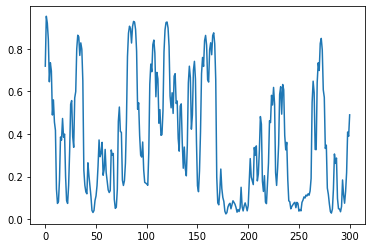

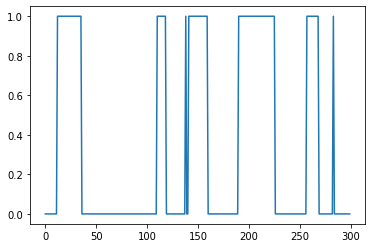

In [12]:
from pylab import *
#Баум_Уэлш
x = array(apstr_bw[-1])
y = array(e_r)
plot(x)
show()
#Витерби
t = array(piv)
plot(t)
show()